In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json

In [2]:
# reading the csv
kr_df = pd.read_csv("KRvideos.csv", encoding="ISO-8859-1")
kr_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,ì¥ëª¨ë ê°ê²íë¤ê³ 1ìµë§ ë¬ë¼ë ì...,ì´ìí¸ëì»¤,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- ë¨í¸ì ëì¤ë¡ë§ ë³¸ ìë´- ì¢ìì...
34563,_Ne9ER-jr20,18.14.06,ì¬ë¬ë¶~ ë ì¦ê° ì´ë ê² ìíí©ëë¤...,ì´ìí ë¬ issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,ìë íì¸ì~! ì´ìí ë¬ ì ëë¤~^^í...
34564,xuOQq_fzEjk,18.14.06,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤,News Express,25,2018-06-12T13:17:29.000Z,"íêµ­|""ë¶í""|""ë¯¸êµ­""|""ì¤êµ­""|""ì¼ë³¸""|""ë...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018ë  6ì 13ì¼ ìì¹¨ ë´ì¤ë±ë¡ëì§ ì...
34565,uXvjxeg08eQ,18.14.06,ìëì ìì ì°¸ê¸° ìì ìëì GO X-...,ìí,22,2018-06-11T11:57:20.000Z,"ìëì|""ìëì ê³ ""|""ìëì GO""|""ìì...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,ìëì ìì ì°¸ê¸° ìì í­ì ì¢ìí...


In [3]:
# reading the json file
file = open("kr_category_id.json")
kr_json = json.load(file)

In [4]:
# looping through the json file and replacing the category id with the category name
length = len(kr_json["items"])
length

kr_df["category_id"] = kr_df["category_id"].astype(str)

for x in range(length):
    id_number = kr_json["items"][x]["id"]
    category_name = kr_json["items"][x]["snippet"]["title"]
    kr_df["category_id"] = kr_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
kr_df["category_id"] = kr_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
kr_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,People & Blogs,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,News & Politics,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,People & Blogs,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,News & Politics,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,News & Politics,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...


In [5]:
# this shows how many videos of each category is present in the data
kr_count_df = pd.DataFrame(kr_df.groupby("category_id").count(), columns=["video_id"])
kr_count_df = kr_count_df.rename(columns={"video_id": "count"})
kr_count_df.sort_values(by=["count"], ascending=False)

,count
category_id,
Entertainment,8955
News & Politics,7582
People & Blogs,7056
Film & Animation,2200
Comedy,2056
Music,1825
Gaming,1392
Sports,936
Pets & Animals,735


In [6]:
# separate dataframe using just the numerical value columns
# this is probably not too needed
kr_dateview_df = pd.DataFrame(kr_df, columns=["trending_date", "views", "likes", "dislikes", "comment_count"])

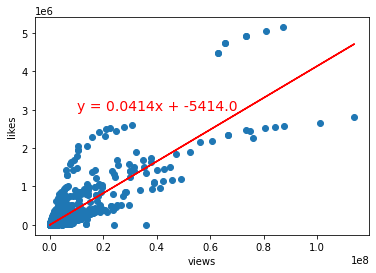

In [7]:
# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(kr_dateview_df["views"], kr_dateview_df["likes"])
regress_value = kr_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(kr_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(kr_dateview_df["views"], kr_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

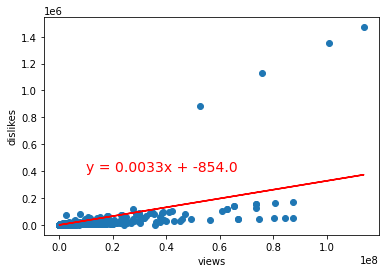

In [8]:
# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(kr_dateview_df["views"], kr_dateview_df["dislikes"])
regress_value = kr_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(kr_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 4e5), fontsize=14, color="red")
plt.scatter(kr_dateview_df["views"], kr_dateview_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()

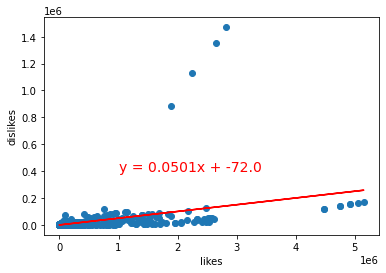

In [9]:
# likes vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(kr_dateview_df["likes"], kr_dateview_df["dislikes"])
regress_value = kr_dateview_df["likes"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(kr_dateview_df["likes"], regress_value, "r-")
plt.annotate(line_eq, (1e6, 4e5), fontsize=14, color="red")
plt.scatter(kr_dateview_df["likes"], kr_dateview_df["dislikes"])
plt.xlabel("likes")
plt.ylabel("dislikes")
plt.show()

In [13]:
# shows how many videos on which category has the comments/ratings disabled, and video removed
kr_no_comment_df = kr_df.loc[kr_df["comments_disabled"] == True, :]
kr_no_rate_df = kr_df.loc[kr_df["ratings_disabled"] == True, :]
kr_no_video_df = kr_df.loc[kr_df["video_error_or_removed"] == True, :]

#kr_no_comment_df["category_id"].value_counts()
#kr_no_rate_df["category_id"].value_counts()
kr_no_video_df["category_id"].value_counts()

Music               23
News & Politics      9
Film & Animation     6
Entertainment        2
Sports               1
Name: category_id, dtype: int64

In [11]:
kr_no_video_df.describe()

,views,likes,dislikes,comment_count
count,4.100000e+01,41.000000,41.000000,41.000000
mean,2.759480e+05,11397.390244,304.829268,1477.073171
std,5.165329e+05,53191.548755,922.902782,5332.188694
min,1.417500e+04,35.000000,2.000000,16.000000
25%,4.592100e+04,267.000000,28.000000,71.000000
50%,1.023090e+05,1006.000000,63.000000,231.000000
75%,1.982290e+05,2786.000000,121.000000,768.000000
max,3.086615e+06,340359.000000,5666.000000,34030.000000


In [15]:
# shows which channel
kr_df["channel_title"].value_counts()

ì ìíì             222
ì ê·ì¬TV              219
ëë´ë°íê¸°          218
ë³´ê²¸ TV                195
JTBC News                182
                        ... 
ë¥ìË                   1
Star Wars                  1
ê¹ìì                  1
C.O Z.A.                   1
ë§ì½ëìëëì½      1
Name: channel_title, Length: 4043, dtype: int64